In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
data = pd.read_csv('jobpostings.csv')

In [3]:
data = data.dropna(subset=['Job Description'])

In [4]:
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

In [5]:
data['Job Description'] = [cleanhtml(x) for x in data['Job Description'].values]

In [6]:
#Lowercasing: Convert all text to lowercase to ensure consistency in case sensitivity.
data['Job Description'] = data['Job Description'].str.lower()
data.head()

,Job Id,Job Title,SOC Code,Job Description,Company Name,Skills,Qualification,City,State,Zipcode,Job Opening Date,Job Closing Date,Status,Website Url
0,89c41c519c3c491929e3082f0ee1d557,"Editor, Celebrations",27-3041.00,"gannett co., inc. (nyse: gci) is a subscriptio...",Gannett,"[Local Media, Editing, Journalism]","[Bachelor of Journalism (B.J.), Master of Jour...",Boston,Massachusetts,2108.0,2021-09-23,2021-09-30,CLOSED,https://www.gannett.com
1,ac0c91f394fa77a00ad72ee3440cb4b7,Software Engineer II,51-8021.00,overview reporting to the director of d...,ERT,"[Java, Application Architecture, CI, Data Stru...",[Bachelor of Computer Science (B.C.S.)],Medford,Massachusetts,2155.0,2021-04-29,2021-09-30,CLOSED,http://www.ert.com
2,4b5748411c4496f56ef33645a27840e0,Principal Software Architect,17-1011.00,digital technology has forever changed busine...,"Sovos Compliance, LLC.","[Java, CSS, Government Compliance, Global Comp...",NaN,Wilmington,Massachusetts,1887.0,2021-01-29,2021-09-30,CLOSED,https://sovos.com
3,7a7dac1bc98365216833008c0fbd063d,Strategy Program Manager,27-2012.03,build your future with sovos digital techno...,"Sovos Compliance, LLC.","[Government Compliance, Global Compliance, Com...",NaN,Wilmington,Massachusetts,1887.0,2021-08-27,2021-09-30,CLOSED,https://sovos.com
4,304aff90fd39fead183f48206f4070c7,Senior Contract Manager,11-9199.00,description labella associates was established...,LaBella Associates,"[Legal, Disciplinary]","[Bachelor of Engineering (B.E./B.Eng.), Any Ba...",Boston,Massachusetts,2108.0,2021-03-11,2021-09-30,CLOSED,http://www.labellapc.com


In [7]:
#Removing Special Characters: Remove special characters, punctuation, and non-alphanumeric characters that might not be relevant for your analysis.

data['Job Description'] = data['Job Description'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
data.head()

,Job Id,Job Title,SOC Code,Job Description,Company Name,Skills,Qualification,City,State,Zipcode,Job Opening Date,Job Closing Date,Status,Website Url
0,89c41c519c3c491929e3082f0ee1d557,"Editor, Celebrations",27-3041.00,gannett co inc nyse gci is a subscriptionled a...,Gannett,"[Local Media, Editing, Journalism]","[Bachelor of Journalism (B.J.), Master of Jour...",Boston,Massachusetts,2108.0,2021-09-23,2021-09-30,CLOSED,https://www.gannett.com
1,ac0c91f394fa77a00ad72ee3440cb4b7,Software Engineer II,51-8021.00,overview reporting to the director of d...,ERT,"[Java, Application Architecture, CI, Data Stru...",[Bachelor of Computer Science (B.C.S.)],Medford,Massachusetts,2155.0,2021-04-29,2021-09-30,CLOSED,http://www.ert.com
2,4b5748411c4496f56ef33645a27840e0,Principal Software Architect,17-1011.00,digital technology has forever changed busine...,"Sovos Compliance, LLC.","[Java, CSS, Government Compliance, Global Comp...",NaN,Wilmington,Massachusetts,1887.0,2021-01-29,2021-09-30,CLOSED,https://sovos.com
3,7a7dac1bc98365216833008c0fbd063d,Strategy Program Manager,27-2012.03,build your future with sovos digital techno...,"Sovos Compliance, LLC.","[Government Compliance, Global Compliance, Com...",NaN,Wilmington,Massachusetts,1887.0,2021-08-27,2021-09-30,CLOSED,https://sovos.com
4,304aff90fd39fead183f48206f4070c7,Senior Contract Manager,11-9199.00,description labella associates was established...,LaBella Associates,"[Legal, Disciplinary]","[Bachelor of Engineering (B.E./B.Eng.), Any Ba...",Boston,Massachusetts,2108.0,2021-03-11,2021-09-30,CLOSED,http://www.labellapc.com


In [8]:
#Tokenization: Tokenize the text into words or phrases. This is especially useful if you plan to analyze text at a word or phrase level.

# from nltk.tokenize import word_tokenize

# data['Job Description'] = data['Job Description'].apply(word_tokenize)
# data.head()

In [9]:
#Removing Stopwords: Remove common stopwords (e.g., "the," "and," "in") that do not carry much information.
# from nltk.corpus import stopwords

# stop_words = set(stopwords.words('english'))
# data['Job Description'] = data['Job Description'].apply(lambda x: [word for word in x if word not in stop_words])
# data.head()

In [10]:
# #Lemmatization or Stemming: Reduce words to their base form (lemmatization) or their root form (stemming) to normalize the text further.
# from nltk.stem import WordNetLemmatizer

# lemmatizer = WordNetLemmatizer()
# data['Job Description'] = data['Job Description'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
# data.head()

In [11]:
# #Handling Numerical Values: If there are numerical values in the text (e.g., salary figures or years), consider how to handle them. You might replace them with placeholders or preprocess them separately.
# data['Job Description'] = data['Job Description'].apply(lambda x: [re.sub(r'\d+', 'NUM', word) for word in x])
# data.head()

In [12]:
#Handling Short Words: Depending on your analysis, you might want to remove very short words (e.g., words with one or two characters) as they may not carry much meaning.
# data['Job Description'] = data['Job Description'].apply(lambda x: [word for word in x if len(word) > 2])
# data.head()

In [13]:
# #Spelling Correction: Depending on the data quality, you might want to perform spelling correction using libraries like TextBlob or autocorrect.
# from textblob import TextBlob

# data['Job Description'] = data['Job Description'].apply(lambda x: str(TextBlob(x).correct()))

In [14]:
# import plotly.graph_objs as go
# import chart_studio.plotly as py

# all_words = data['Job Description'].str.split(expand=True).unstack().value_counts()
# data = [go.Bar(
#             x = all_words.index.values[2:50],
#             y = all_words.values[2:50],
#             marker= dict(colorscale='Jet',
#                          color = all_words.values[2:100]
#                         ),
#             text='Word counts'
#     )]

# layout = go.Layout(
#     title='Top 50 (Uncleaned) Word frequencies in the training dataset'
# )

# fig = go.Figure(data=data, layout=layout)

# py.iplot(fig, filename='basic-bar')

<AxesSubplot: >

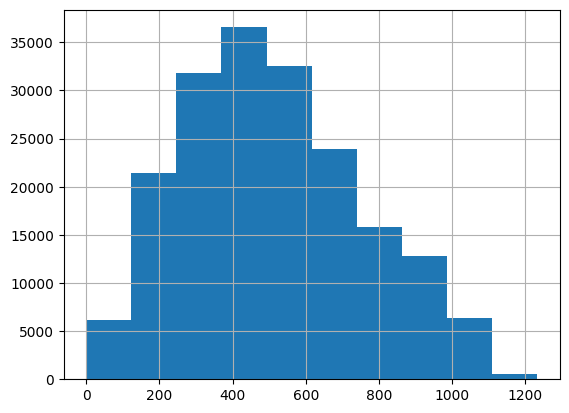

In [15]:
# Let us take a look at distribution of words in each tweet
data['Job Description'].str.split().\
    map(lambda x: len(x)).\
    hist()

<AxesSubplot: >

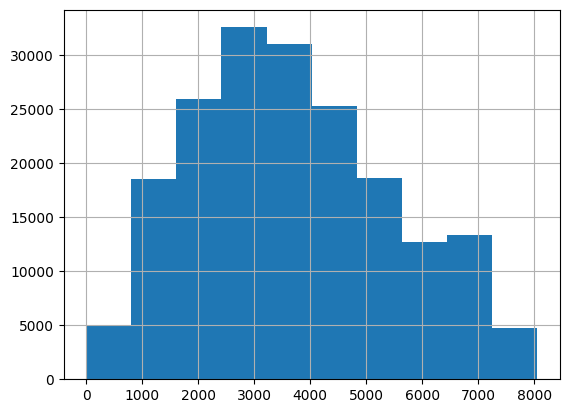

In [16]:
# Plotting the character count for the tweets
data['Job Description'].str.len().hist()

In [17]:
from nltk.corpus import stopwords
stopword = stopwords.words('english')

data['stopwords'] = data['Job Description'].apply(lambda x: len([x for x in x.split() if x in stopword]))
data[['Job Description','stopwords']].head()

,Job Description,stopwords
0,gannett co inc nyse gci is a subscriptionled a...,350
1,overview reporting to the director of d...,263
2,digital technology has forever changed busine...,299
3,build your future with sovos digital techno...,205
4,description labella associates was established...,289


<AxesSubplot: >

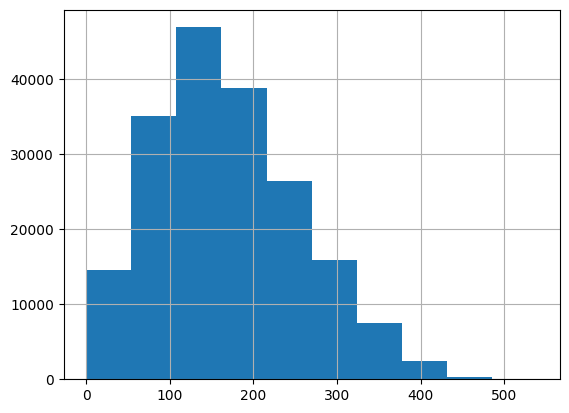

In [18]:
# Distribution of stopwords
data['Job Description'].map(lambda x: len([x for x in x.split() if x in stopword])).hist()

In [19]:
data['Job Description'] = data['Job Description'].str.replace('[^\w\s]','')

data['Job Description'] = data['Job Description'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))
data['Job Description'].head()

/var/folders/ld/tqq599zd5412hhx5r0t2m1nr0000gp/T/ipykernel_18457/2991138557.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Job Description'] = data['Job Description'].str.replace('[^\w\s]','')


0    gannett co inc nyse gci subscriptionled digita...
1    overview reporting director data integration s...
2    digital technology forever changed business tr...
3    build future sovos digital technology forever ...
4    description labella associates established 197...
Name: Job Description, dtype: object

In [20]:
# Defining a function to visualise n-grams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot: >

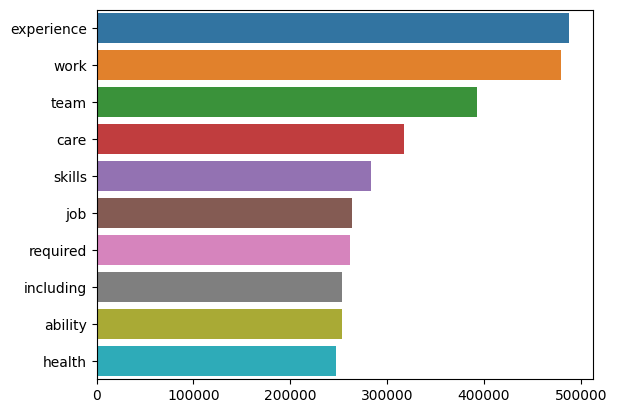

In [21]:
top_unigrams = get_top_ngram(data['Job Description'],1)[:10]
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

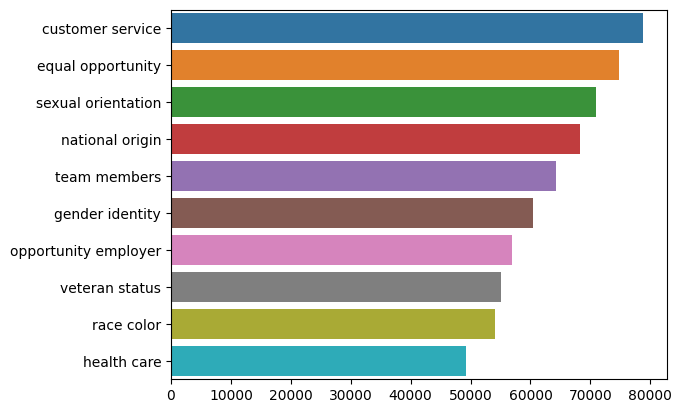

In [22]:
# Visualising the most frequent bigrams in the tweets
top_bigrams = get_top_ngram(data['Job Description'],2)[:10]
x,y = map(list,zip(*top_bigrams))
sns.barplot(x = y,y = x)

<AxesSubplot: >

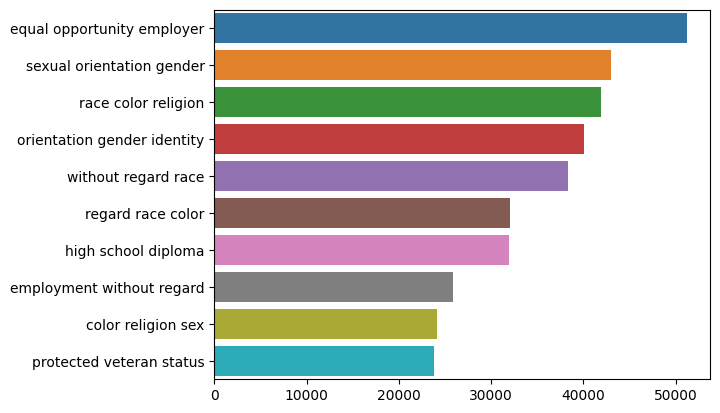

In [23]:
# Visualising the most frequent trigrams in the tweets
top_trigrams = get_top_ngram(data['Job Description'],3)[:10]
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y,y = x)

In [30]:
data.to_csv('cleaned_jobpostings.csv', index=False)

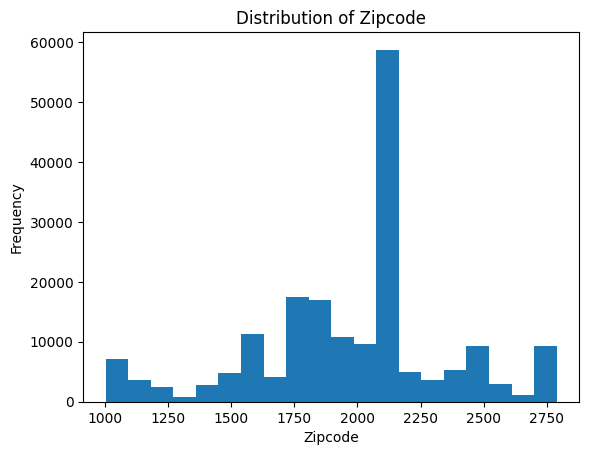

In [31]:
import matplotlib.pyplot as plt

# Histogram of Zipcode
plt.hist(data['Zipcode'], bins=20)
plt.xlabel('Zipcode')
plt.ylabel('Frequency')
plt.title('Distribution of Zipcode')
plt.show()

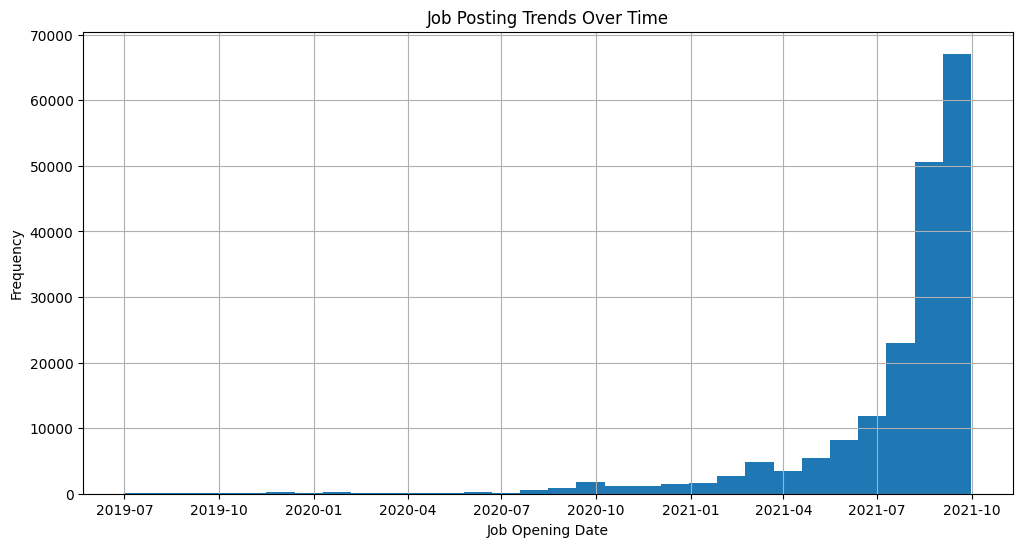

In [33]:
# Convert date columns to datetime
data['Job Opening Date'] = pd.to_datetime(data['Job Opening Date'])
data['Job Closing Date'] = pd.to_datetime(data['Job Closing Date'])

# Analyze job posting trends over time
data['Job Opening Date'].hist(bins=30, figsize=(12, 6))
plt.xlabel('Job Opening Date')
plt.ylabel('Frequency')
plt.title('Job Posting Trends Over Time')
plt.show()

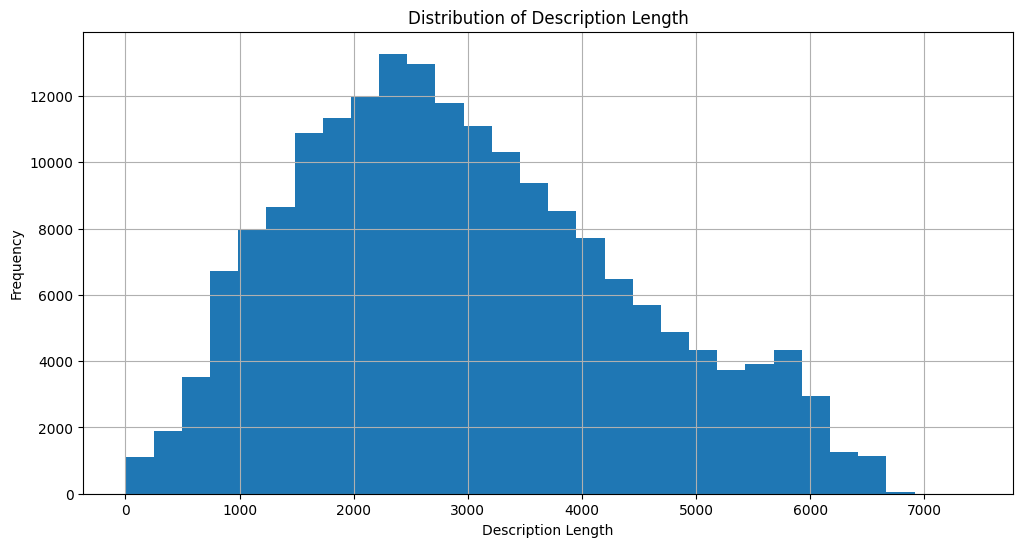

In [34]:
# Analyze the length of job descriptions
data['Description Length'] = data['Job Description'].apply(len)
data['Description Length'].hist(bins=30, figsize=(12, 6))
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.title('Distribution of Description Length')
plt.show()

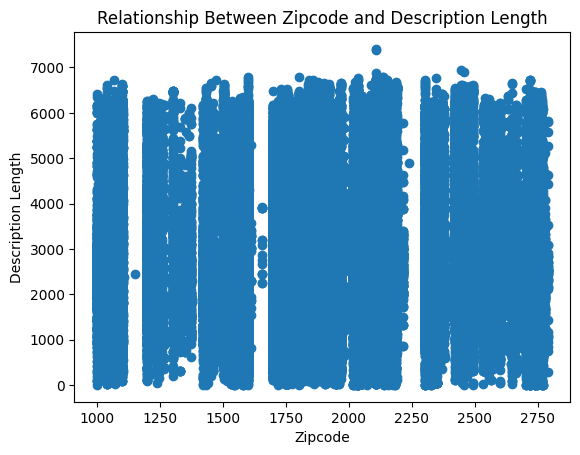

In [35]:
# Example: Scatter plot to explore the relationship between Description Length and Zipcode
plt.scatter(data['Zipcode'], data['Description Length'])
plt.xlabel('Zipcode')
plt.ylabel('Description Length')
plt.title('Relationship Between Zipcode and Description Length')
plt.show()